In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x2c9e8815c10>)

In [4]:
!pip install pandas --quiet

In [5]:
import pandas as pd


In [6]:
medical_df = pd.read_csv("medical.csv")

In [7]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
!pip install plotly matplotlib seaborn --quiet

In [9]:
!pip install nbformat --quiet

In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [13]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df, 
                   x='sex', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [24]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')

fig.update_traces(marker_size=5)

mid_charge_count = medical_df[(medical_df['charges'] >= 16000) & (medical_df['charges'] < 25000)].shape[0]
high_charge_count = medical_df[medical_df['charges'] >= 25000].shape[0]

# Add annotations for the count
fig.add_annotation(x=0.02, y=0.98, xref="paper", yref="paper",
                   text=f"Charges 16k-25k: {mid_charge_count}", showarrow=False,
                   font=dict(size=10), align="left")
fig.add_annotation(x=0.02, y=0.93, xref="paper", yref="paper",
                   text=f"Charges 25k+: {high_charge_count}", showarrow=False,
                   font=dict(size=10), align="left")

# Add horizontal lines to show the charge ranges
fig.add_hline(y=16000, line_dash="dash", line_color="gray", opacity=0.7)
fig.add_hline(y=30000, line_dash="dash", line_color="gray", opacity=0.7)

fig.show()

In [25]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [26]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [27]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [28]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [29]:
def estimate_charges(age, w, b):
    return w * age + b;

In [78]:
w = 320
b = -6000

In [79]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

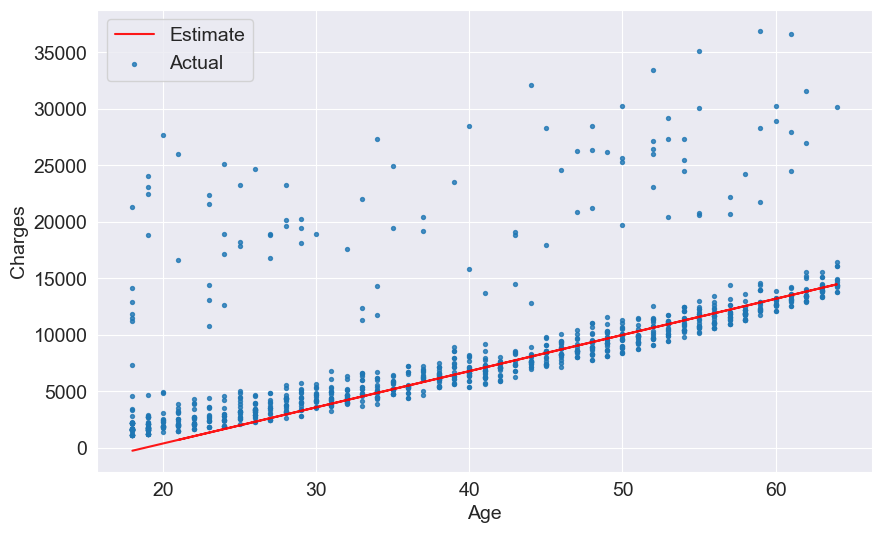

In [80]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [86]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [81]:
!pip install numpy --quiet

In [82]:
import numpy as np

In [94]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [153]:
w = 290
b = -4000

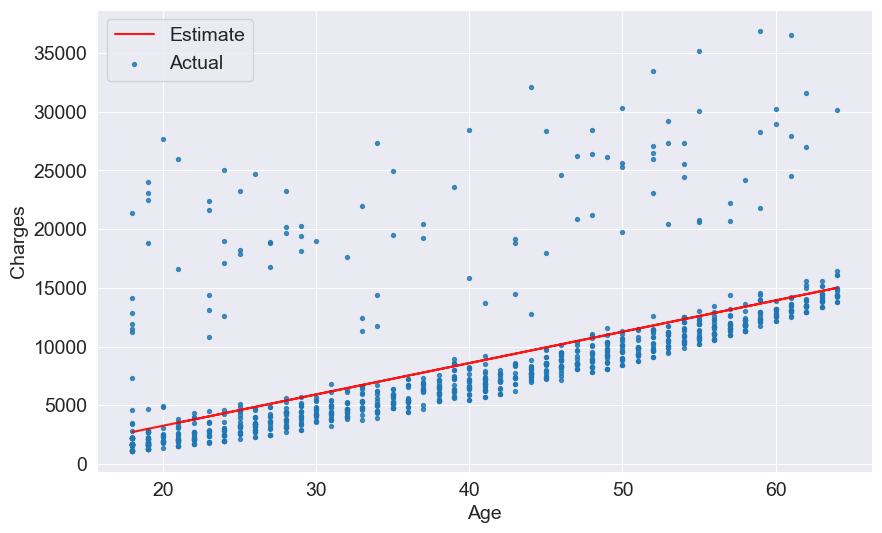

In [154]:
try_parameters(w,b)

In [155]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [156]:
rmse(targets, predicted)

4662.516524487403

Linear Regression using Scikit-Learn

In [143]:
!pip install scikit-learn --quiet

In [158]:
from sklearn.linear_model import LinearRegression

In [145]:
model = LinearRegression()

In [159]:
inputs = non_smoker_df[['age', "bmi"]]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 2)
targets.shape : (1064,)


In [160]:
model.fit(inputs, targets)

LinearRegression()

In [171]:
model.predict(np.array([[18, 35],[28, 33],[52, 44]]))

C:\Users\Mayank Thakur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 2757.78799937,  5412.40282772, 11895.27094694])

In [174]:
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("Loss: ",loss)

Loss:  4662.3128354612945


In [170]:
non_smoker_df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]>

In [152]:
rmse(targets, predictions)

4662.505766636395

In [175]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


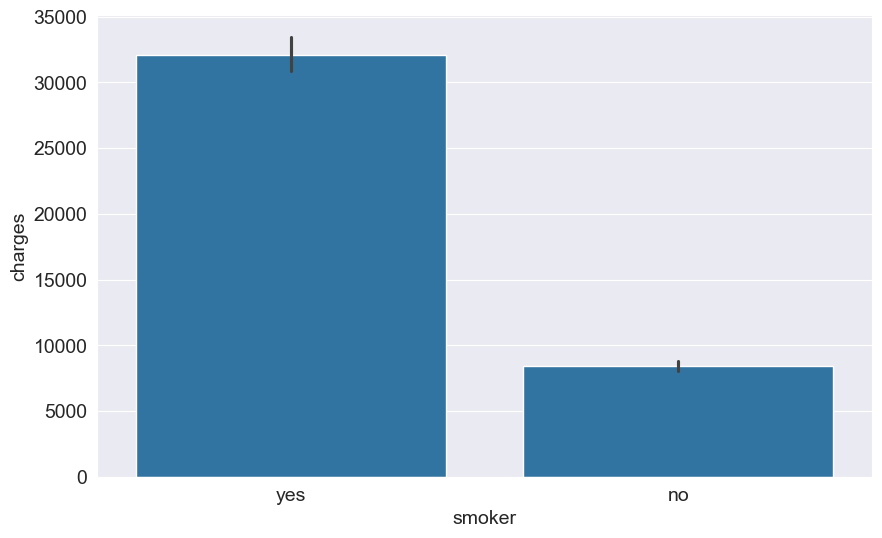

In [176]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [177]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [178]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

In [180]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [181]:
sex_codes = {'female': 0, 'male': 1}

In [182]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

One hot encoding

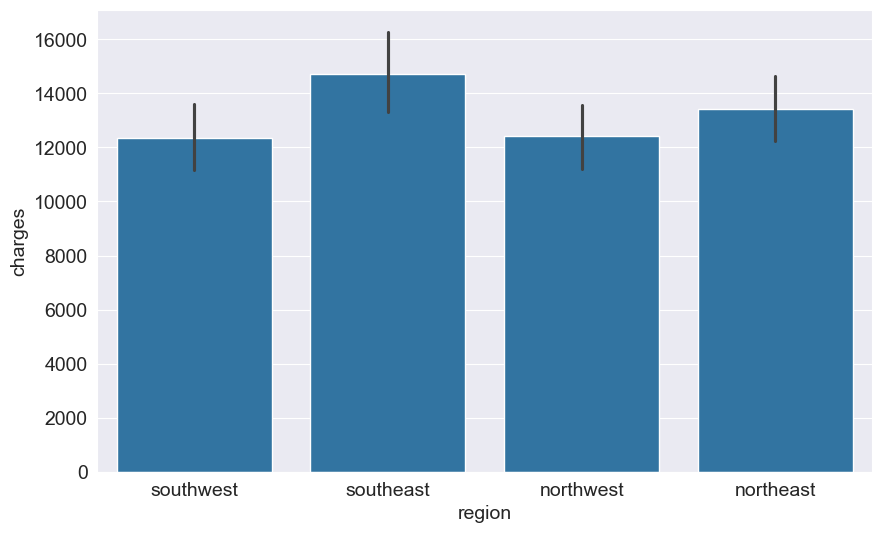

In [183]:
sns.barplot(data=medical_df, x='region', y='charges');

In [184]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [185]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [186]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [187]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [188]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


Standardization

In [189]:
from sklearn.preprocessing import StandardScaler

In [192]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [194]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [195]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [193]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [196]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [197]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [198]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
